<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>Logistic Regression & KNN & SVM Project - Adult Income Prediction</b></p>

<div style="text-align: center;">
    <img src="https://cdn.corporatefinanceinstitute.com/assets/income-1024x662.jpeg" width="600" height="600"/>
</div>

<b>Contains:</b>
<ul>
<li><a href="#import-library">Importing Libraries</a></li>
<li><a href="#loading-dataset">Loading The Dataset</a></li>
<li><a href="#eda">Understanding Data & EDA</a></li>
<li><a href="#data-pre">Data Pre-Processing</a></li>
<li><a href="#log-model">Logistic Regression</a></li>
<li><a href="#knn-model">K Nearest Neigbors (KNN)</a></li>
<li><a href="#svm-model">Support Vector Machine (SVC)</a></li>
<li><a href="#compare-models">Comparing Models</a></li>
<li><a href="#final-model">Final Model & Prediction</a></li>
<li><a href="#conclusion">Conclusion</a></li>
</ul>

# <font color='steelblue'> <b>Introduction</b><font color='black'>

This project focuses on analyzing various demographic and socio-economic factors that influence the annual income levels of adult individuals in the United States. The dataset used includes variables such as age, education level, marital status, occupation, and working hours. Throughout the project, machine learning models were developed to predict whether an individual's income exceeds or falls below $50,000 using these variables. Comprehensive testing was conducted through data preprocessing, feature engineering, and the application of different algorithms, leading to the selection of the best-performing model. This study provides a foundation for understanding income inequality and developing predictive models for decision support systems.

<a id='import-library'></a>
# <font color='steelblue'> <b>Importing Libraries</b><font color='black'>

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from skimpy import skim
import missingno as msno

from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler
from sklearn.pipeline import Pipeline
from sklearn.metrics import confusion_matrix, classification_report, ConfusionMatrixDisplay
from sklearn.metrics import make_scorer, precision_score, recall_score, accuracy_score, f1_score
from sklearn.metrics import RocCurveDisplay, PrecisionRecallDisplay, roc_auc_score, auc, roc_curve, average_precision_score, precision_recall_curve
from sklearn.preprocessing import OrdinalEncoder, OneHotEncoder
from sklearn.compose import make_column_transformer

plt.rcParams["figure.figsize"] = (8,6)

import warnings
warnings.filterwarnings("ignore")
warnings.warn("this will not show")

<a id='loading-dataset'></a>
# <font color='steelblue'> <b>Loading The Dataset</b><font color='black'>

In [6]:
df0 = pd.read_csv("adult.csv")
df = df0.copy()
df.head()

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
0,90,?,77053,HS-grad,9,Widowed,?,Not-in-family,White,Female,0,4356,40,United-States,<=50K
1,82,Private,132870,HS-grad,9,Widowed,Exec-managerial,Not-in-family,White,Female,0,4356,18,United-States,<=50K
2,66,?,186061,Some-college,10,Widowed,?,Unmarried,Black,Female,0,4356,40,United-States,<=50K
3,54,Private,140359,7th-8th,4,Divorced,Machine-op-inspct,Unmarried,White,Female,0,3900,40,United-States,<=50K
4,41,Private,264663,Some-college,10,Separated,Prof-specialty,Own-child,White,Female,0,3900,40,United-States,<=50K


In [7]:
df.sample(5)

,age,workclass,fnlwgt,education,education.num,marital.status,occupation,relationship,race,sex,capital.gain,capital.loss,hours.per.week,native.country,income
4032,32,Private,107793,HS-grad,9,Divorced,Other-service,Own-child,White,Male,2174,0,40,United-States,<=50K
12160,23,Private,218782,10th,6,Never-married,Handlers-cleaners,Other-relative,Other,Male,0,0,40,United-States,<=50K
4947,42,?,257780,11th,7,Married-civ-spouse,?,Husband,White,Male,0,0,15,United-States,<=50K
16792,39,Self-emp-inc,168355,HS-grad,9,Married-civ-spouse,Exec-managerial,Husband,White,Male,0,0,70,United-States,<=50K
32338,18,Never-worked,153663,Some-college,10,Never-married,?,Own-child,White,Male,0,0,4,United-States,<=50K


**Data Set Information:**

This dataset was obtained from UCI Machine Learning Repository. The aim of this problem is to classify adults in two different groups based on their income where group 1 has an income less than USD 50k and group 2 has an income of more than or equal to USD 50k. The data available at hand comes from Census 1994.

**Attribute Information:**

**Age**: Describes the age of individuals. Continuous.

**Workclass**: Private, Self-emp-not-inc, Self-emp-inc, Federal-gov, Local-gov, State-gov, Without-pay, Never-worked.

**fnlwgt**: Continuous value. This is a weighting factor created by the Census Bureau in the United States and indicates the number of people each data entry actually represents. For example, when the fnlwgt value for a data entry is 100, that data entry is considered to represent 100 people.

However, this feature is generally not used directly in analysis or model training because these weights do not have a direct bearing on individual data points when training or testing the model. However, if a more in-depth demographic analysis is being done on the data set, these weight values ​​may be useful.

**education**: Bachelors, Some-college, 11th, HS-grad, Prof-school, Assoc-acdm, Assoc-voc, 9th, 7th-8th, 12th, Masters, 1st-4th, 10th, Doctorate, 5th-6th, Preschool.

**education-num**: Number of years spent in education. Continuous.

**marital-status**: Married-civ-spouse, Divorced, Never-married, Separated, Widowed, Married-spouse-absent, Married-AF-spouse.

**occupation**: Tech-support, Craft-repair, Other-service, Sales, Exec-managerial, Prof-specialty, Handlers-cleaners, Machine-op-inspct, Adm-clerical, Farming-fishing, Transport-moving, Priv-house-serv, Protective-serv, Armed-Forces.

**relationship**: Wife, Own-child, Husband, Not-in-family, Other-relative, Unmarried.

**race**: White, Asian-Pac-Islander, Amer-Indian-Eskimo, Other, Black.

**sex**: Female, Male.

**capital-gain**: Continuous values ​​that represent an individual's gain from asset sales (for example, the sale of stocks or real estate).

**capital-loss**: Continuous value that represents the loss incurred by an individual from the sale of assets (for example, the sale of stocks or real estate).

**hours-per-week**: The total working hours per week. Continuous.

**native-country**: United-States, Cambodia, England, Puerto-Rico, Canada, Germany, Outlying-US(Guam-USVI-etc), India, Japan, Greece, South, China, Cuba, Iran, Honduras, Philippines, Italy, Poland, Jamaica, Vietnam, Mexico, Portugal, Ireland, France, Dominican-Republic, Laos, Ecuador, Taiwan, Haiti, Columbia, Hungary, Guatemala, Nicaragua, Scotland, Thailand, Yugoslavia, El-Salvador, Trinadad&Tobago, Peru, Hong, Holand-Netherlands.

**salary**: >50K,<=50K.

<a id='eda'></a>
# <font color='steelblue'> <b>Understanding Data & EDA</b><font color='black'>

In [10]:
df.shape

(32561, 15)

In [11]:
df.columns = df.columns.str.replace(".", "_")
df.columns

Index(['age', 'workclass', 'fnlwgt', 'education', 'education_num',
       'marital_status', 'occupation', 'relationship', 'race', 'sex',
       'capital_gain', 'capital_loss', 'hours_per_week', 'native_country',
       'income'],
      dtype='object')

In [12]:
# Checks for duplicate observations in the dataset and removes them if found

def duplicate_values(df):
    print("Duplicate check...")
    num_duplicates = df.duplicated(subset=None, keep="first").sum()
    if num_duplicates > 0:
        print("There are", num_duplicates, "duplicated observations in the dataset.")
        df.drop_duplicates(keep="first", inplace=True)
        print(num_duplicates, "duplicates were dropped!")
        print("No more duplicate rows!")
    else:
        print("There are no duplicated observations in the dataset.")

duplicate_values(df)

Duplicate check...
There are 24 duplicated observations in the dataset.
24 duplicates were dropped!
No more duplicate rows!


In [13]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 32537 entries, 0 to 32560
Data columns (total 15 columns):
 #   Column          Non-Null Count  Dtype 
---  ------          --------------  ----- 
 0   age             32537 non-null  int64 
 1   workclass       32537 non-null  object
 2   fnlwgt          32537 non-null  int64 
 3   education       32537 non-null  object
 4   education_num   32537 non-null  int64 
 5   marital_status  32537 non-null  object
 6   occupation      32537 non-null  object
 7   relationship    32537 non-null  object
 8   race            32537 non-null  object
 9   sex             32537 non-null  object
 10  capital_gain    32537 non-null  int64 
 11  capital_loss    32537 non-null  int64 
 12  hours_per_week  32537 non-null  int64 
 13  native_country  32537 non-null  object
 14  income          32537 non-null  object
dtypes: int64(6), object(9)
memory usage: 4.0+ MB


In [14]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,32537.0,38.585549,13.637984,17.0,28.0,37.0,48.0,90.0
fnlwgt,32537.0,189780.848511,105556.471009,12285.0,117827.0,178356.0,236993.0,1484705.0
education_num,32537.0,10.081815,2.571633,1.0,9.0,10.0,12.0,16.0
capital_gain,32537.0,1078.443741,7387.957424,0.0,0.0,0.0,0.0,99999.0
capital_loss,32537.0,87.368227,403.101833,0.0,0.0,0.0,0.0,4356.0
hours_per_week,32537.0,40.440329,12.346889,1.0,40.0,40.0,45.0,99.0


In [15]:
df.describe(include='object').T

,count,unique,top,freq
workclass,32537,9,Private,22673
education,32537,16,HS-grad,10494
marital_status,32537,7,Married-civ-spouse,14970
occupation,32537,15,Prof-specialty,4136
relationship,32537,6,Husband,13187
race,32537,5,White,27795
sex,32537,2,Male,21775
native_country,32537,42,United-States,29153
income,32537,2,<=50K,24698


In [16]:
df.isnull().sum()

age               0
workclass         0
fnlwgt            0
education         0
education_num     0
marital_status    0
occupation        0
relationship      0
race              0
sex               0
capital_gain      0
capital_loss      0
hours_per_week    0
native_country    0
income            0
dtype: int64

In [17]:
skim(df)

╭──────────────────────────────────────────────── skimpy summary ─────────────────────────────────────────────────╮
│          Data Summary                Data Types                                                                 │
│ ┏━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┓ ┏━━━━━━━━━━━━━┳━━━━━━━┓                                                          │
│ ┃ dataframe         ┃ Values ┃ ┃ Column Type ┃ Count ┃                                                          │
│ ┡━━━━━━━━━━━━━━━━━━━╇━━━━━━━━┩ ┡━━━━━━━━━━━━━╇━━━━━━━┩                                                          │
│ │ Number of rows    │ 32537  │ │ string      │ 9     │                                                          │
│ │ Number of columns │ 15     │ │ int32       │ 6     │                                                          │
│ └───────────────────┴────────┘ └─────────────┴───────┘                                                          │
│                                                     number                                                      │
│ ┏━━━━━━━━━━━━━━━━━━┳━━━━━┳━━━━━━━┳━━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┳━━━━━━━━┳━━━━━━━━━┳━━━━━━━━┓  │
│ ┃ column_name      ┃ NA  ┃ NA %  ┃ mean    ┃ sd      ┃ p0     ┃ p25     ┃ p50    ┃ p75    ┃ p100    ┃ hist   ┃  │
│ ┡━━━━━━━━━━━━━━━━━━╇━━━━━╇━━━━━━━╇━━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━╇━━━━━━━━╇━━━━━━━━━╇━━━━━━━━┩  │
│ │ age              │   0 │     0 │   38.59 │   13.64 │     17 │      28 │     37 │     48 │      90 │ ▇▇▆▃▁  │  │
│ │ fnlwgt           │   0 │     0 │  189800 │  105600 │  12280 │  117800 │ 178400 │ 237000 │ 1485000 │   ▇▂   │  │
│ │ education_num    │   0 │     0 │   10.08 │   2.572 │      1 │       9 │     10 │     12 │      16 │  ▁▁▇▃▁ │  │
│ │ capital_gain     │   0 │     0 │    1078 │    7388 │      0 │       0 │      0 │      0 │  100000 │   ▇    │  │
│ │ capital_loss     │   0 │     0 │   87.37 │   403.1 │      0 │       0 │      0 │      0 │    4356 │   ▇    │  │
│ │ hours_per_week   │   0 │     0 │   40.44 │   12.35 │      1 │      40 │     40 │     45 │      99 │  ▁▂▇▂  │  │
│ └──────────────────┴─────┴───────┴─────────┴─────────┴────────┴─────────┴────────┴────────┴─────────┴────────┘  │
│                                                     string                                                      │
│ ┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━┳━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┓  │
│ ┃ column_name                   ┃ NA     ┃ NA %       ┃ words per row               ┃ total words            ┃  │
│ ┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━╇━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━┩  │
│ │ workclass                     │      0 │          0 │                           1 │                  32537 │  │
│ │ education                     │      0 │          0 │                           1 │                  32537 │  │
│ │ marital_status                │      0 │          0 │                           1 │                  32537 │  │
│ │ occupation                    │      0 │          0 │                           1 │                  32537 │  │
│ │ relationship                  │      0 │          0 │                           1 │                  32537 │  │
│ │ race                          │      0 │          0 │                           1 │                  32537 │  │
│ │ sex                           │      0 │          0 │                           1 │                  32537 │  │
│ │ native_country                │      0 │          0 │                           1 │                  32537 │  │
│ │ income                        │      0 │          0 │                           1 │                  32537 │  │
│ └───────────────────────────────┴────────┴────────────┴─────────────────────────────┴────────────────────────┘  │
╰────────────────────────────────────────────────────── End ──────────────────────────────────────────────────────╯

## <font color='#skyblue'> <b>Checking Object Columns</b><font color='black'>

### <font color='skyblue'> <b>"workclass" Column</b><font color='black'>

In [20]:
df.workclass.isnull().sum()

0

In [21]:
df.workclass.unique()

array(['?', 'Private', 'State-gov', 'Federal-gov', 'Self-emp-not-inc',
       'Self-emp-inc', 'Local-gov', 'Without-pay', 'Never-worked'],
      dtype=object)

This column contains the value '**?**'. This value is actually NaN value. Let's convert this value from str dtype to nan dtype.

In [23]:
df['workclass'] = df['workclass'].replace('?', np.nan)

In [24]:
df.workclass.value_counts()

workclass
Private             22673
Self-emp-not-inc     2540
Local-gov            2093
State-gov            1298
Self-emp-inc         1116
Federal-gov           960
Without-pay            14
Never-worked            7
Name: count, dtype: int64

In [25]:
df.workclass.isnull().sum() # '?' values ​​have turned into NaN values. NaN values will be checked in NaN Values section.

1836

### <font color='skyblue'> <b>"education" Column</b><font color='black'>

In [27]:
df.education.unique()

array(['HS-grad', 'Some-college', '7th-8th', '10th', 'Doctorate',
       'Prof-school', 'Bachelors', 'Masters', '11th', 'Assoc-acdm',
       'Assoc-voc', '1st-4th', '5th-6th', '12th', '9th', 'Preschool'],
      dtype=object)

This column seems OK for now.

### <font color='skyblue'> <b>"marital_status" Column</b><font color='black'>

In [30]:
df.marital_status.unique()

array(['Widowed', 'Divorced', 'Separated', 'Never-married',
       'Married-civ-spouse', 'Married-spouse-absent', 'Married-AF-spouse'],
      dtype=object)

This column seems OK for now.

### <font color='skyblue'> <b>"occupation" Column</b><font color='black'>

In [33]:
df.occupation.isnull().sum()

0

In [34]:
df.occupation.unique()

array(['?', 'Exec-managerial', 'Machine-op-inspct', 'Prof-specialty',
       'Other-service', 'Adm-clerical', 'Craft-repair',
       'Transport-moving', 'Handlers-cleaners', 'Sales',
       'Farming-fishing', 'Tech-support', 'Protective-serv',
       'Armed-Forces', 'Priv-house-serv'], dtype=object)

This column contains the value '**?**' too. This value is actually NaN value. Let's convert this value from str type to nan type.

In [36]:
df['occupation'] = df['occupation'].replace('?', np.nan)

In [37]:
df.occupation.value_counts()

occupation
Prof-specialty       4136
Craft-repair         4094
Exec-managerial      4065
Adm-clerical         3768
Sales                3650
Other-service        3291
Machine-op-inspct    2000
Transport-moving     1597
Handlers-cleaners    1369
Farming-fishing       992
Tech-support          927
Protective-serv       649
Priv-house-serv       147
Armed-Forces            9
Name: count, dtype: int64

In [38]:
df.occupation.isnull().sum() # '?' values ​​have turned into NaN values. NaN values will be checked in NaN Values section.

1843

### <font color='skyblue'> <b>"relationship" Column</b><font color='black'>

In [40]:
df.relationship.unique()

array(['Not-in-family', 'Unmarried', 'Own-child', 'Other-relative',
       'Husband', 'Wife'], dtype=object)

This column seems OK for now.

### <font color='skyblue'> <b>"race" Column</b><font color='black'>

In [43]:
df.race.unique()

array(['White', 'Black', 'Asian-Pac-Islander', 'Other',
       'Amer-Indian-Eskimo'], dtype=object)

This column seems OK for now.

### <font color='skyblue'> <b>"sex" Column</b><font color='black'>

In [46]:
df.sex.unique()

array(['Female', 'Male'], dtype=object)

This column seems OK for now.

### <font color='skyblue'> <b>"native_country" Column</b><font color='black'>

In [49]:
df.native_country.isnull().sum()

0

In [50]:
df.native_country.unique()

array(['United-States', '?', 'Mexico', 'Greece', 'Vietnam', 'China',
       'Taiwan', 'India', 'Philippines', 'Trinadad&Tobago', 'Canada',
       'South', 'Holand-Netherlands', 'Puerto-Rico', 'Poland', 'Iran',
       'England', 'Germany', 'Italy', 'Japan', 'Hong', 'Honduras', 'Cuba',
       'Ireland', 'Cambodia', 'Peru', 'Nicaragua', 'Dominican-Republic',
       'Haiti', 'El-Salvador', 'Hungary', 'Columbia', 'Guatemala',
       'Jamaica', 'Ecuador', 'France', 'Yugoslavia', 'Scotland',
       'Portugal', 'Laos', 'Thailand', 'Outlying-US(Guam-USVI-etc)'],
      dtype=object)

This column contains the value '**?**' too. This value is actually NaN value. Let's convert this value from str type to nan type.

In [52]:
df['native_country'] = df['native_country'].replace('?', np.nan)

In [53]:
df.native_country.value_counts()

native_country
United-States                 29153
Mexico                          639
Philippines                     198
Germany                         137
Canada                          121
Puerto-Rico                     114
El-Salvador                     106
India                           100
Cuba                             95
England                          90
Jamaica                          81
South                            80
China                            75
Italy                            73
Dominican-Republic               70
Vietnam                          67
Guatemala                        62
Japan                            62
Poland                           60
Columbia                         59
Taiwan                           51
Haiti                            44
Iran                             43
Portugal                         37
Nicaragua                        34
Peru                             31
Greece                           29
France       

In [54]:
df.native_country.isnull().sum() # '?' values ​​have turned into NaN values. NaN values will be checked in NaN Values section.

582

### <font color='skyblue'> <b>"income" Column</b><font color='black'>

In [56]:
df.income.unique()

array(['<=50K', '>50K'], dtype=object)

This column seems OK for now.

In [58]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [59]:
df.isnull().sum().sum()

4261

## <font color='#skyblue'> <b>Checking Numeric Columns</b><font color='black'>

### <font color='skyblue'> <b>Checking Outliers</b><font color='black'>

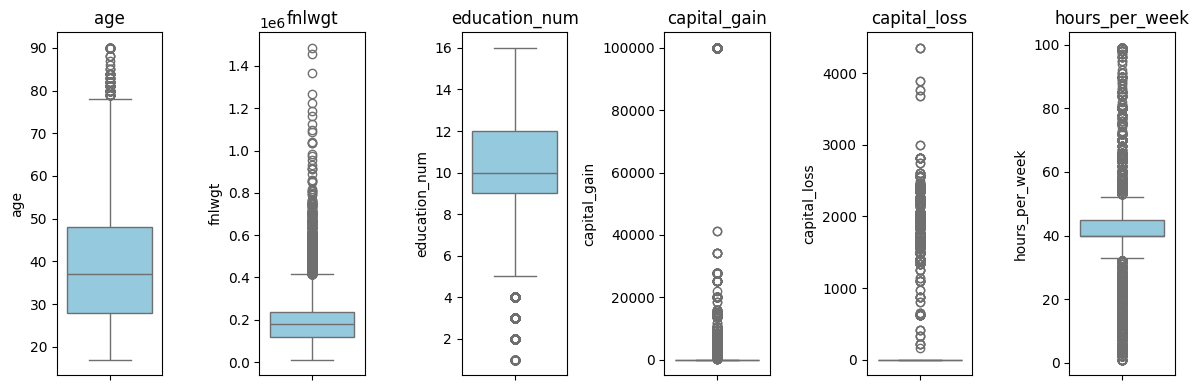

In [62]:
# Checking Outliers in Individual Features
x = 0
#Numerical features;  
numeric_columns = df.select_dtypes(include=['number']).columns
        
# Create a figure with specified size
plt.figure(figsize=(16, 4))

for col in numeric_columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout() 
plt.show()

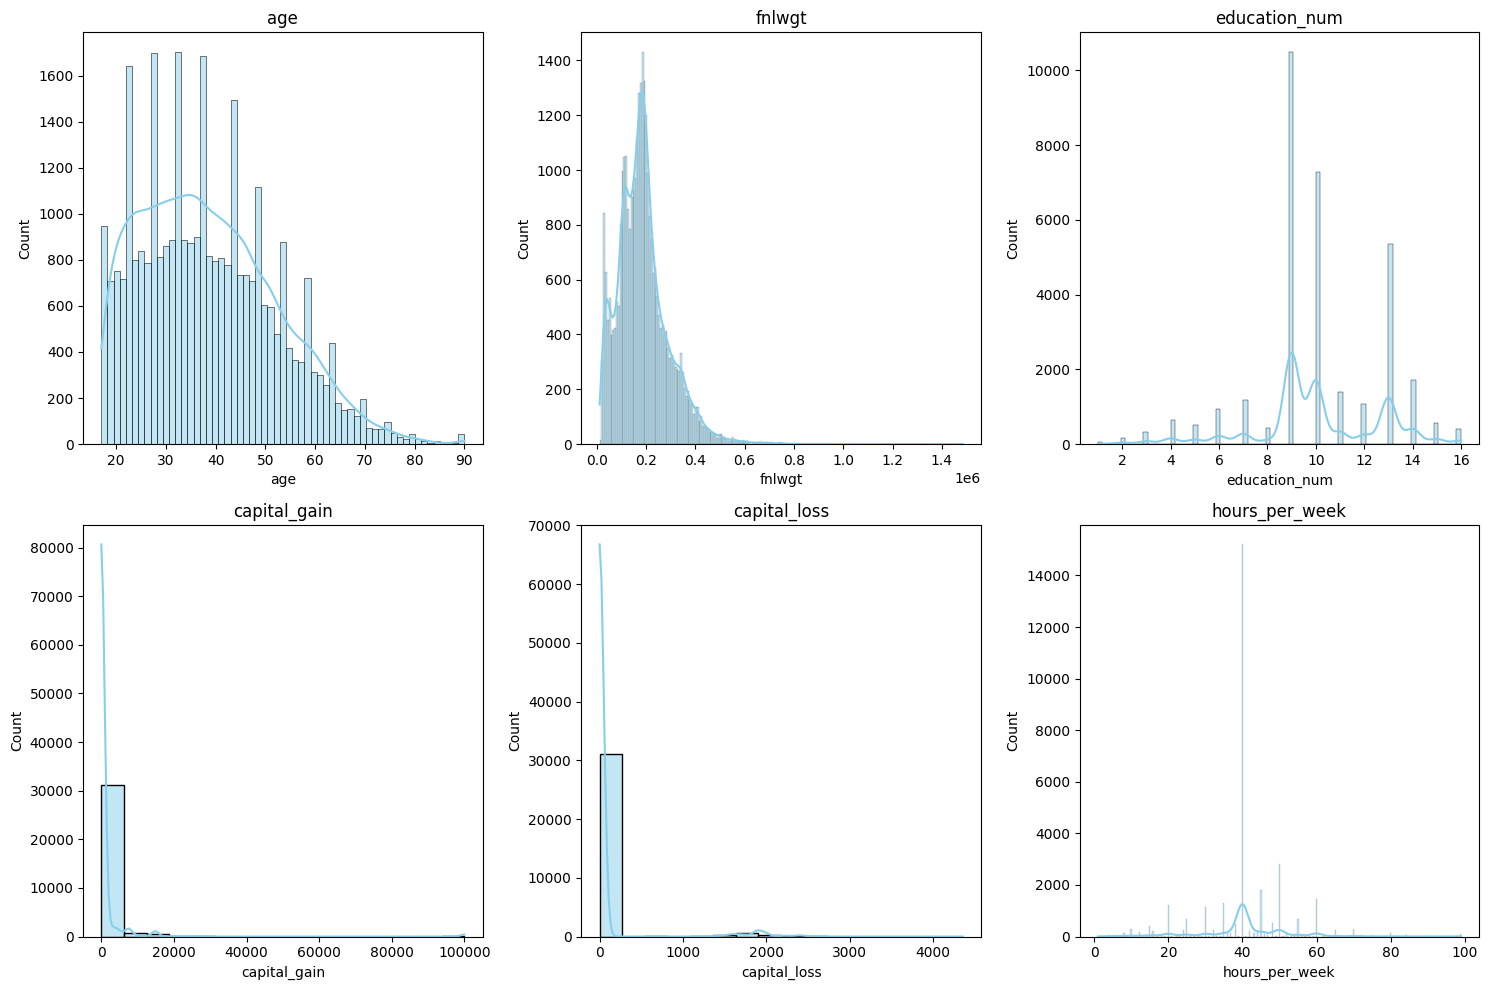

In [63]:
columns = numeric_columns
n_cols = 3
n_rows = (len(columns) + n_cols - 1) // n_cols

fig, axes = plt.subplots(n_rows, n_cols, figsize=(15, 5 * n_rows))
axes = axes.flatten()

for i, column in enumerate(columns):
    sns.histplot(df[column], kde=True, ax=axes[i], color='skyblue')
    axes[i].set_title(column)
    
for i in range(len(columns), len(axes)):
    fig.delaxes(axes[i])

plt.tight_layout()
plt.show()

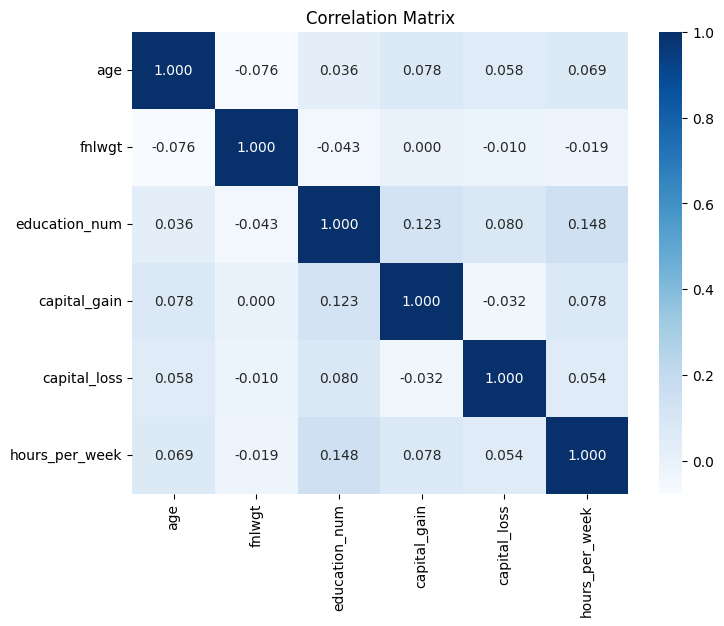

In [64]:
numeric_columns = df.select_dtypes(include=['int64', 'float64'])
correlation_matrix = numeric_columns.corr()

sns.heatmap(correlation_matrix, annot=True, fmt=".3f", cmap="Blues")
plt.title("Correlation Matrix")
plt.show()

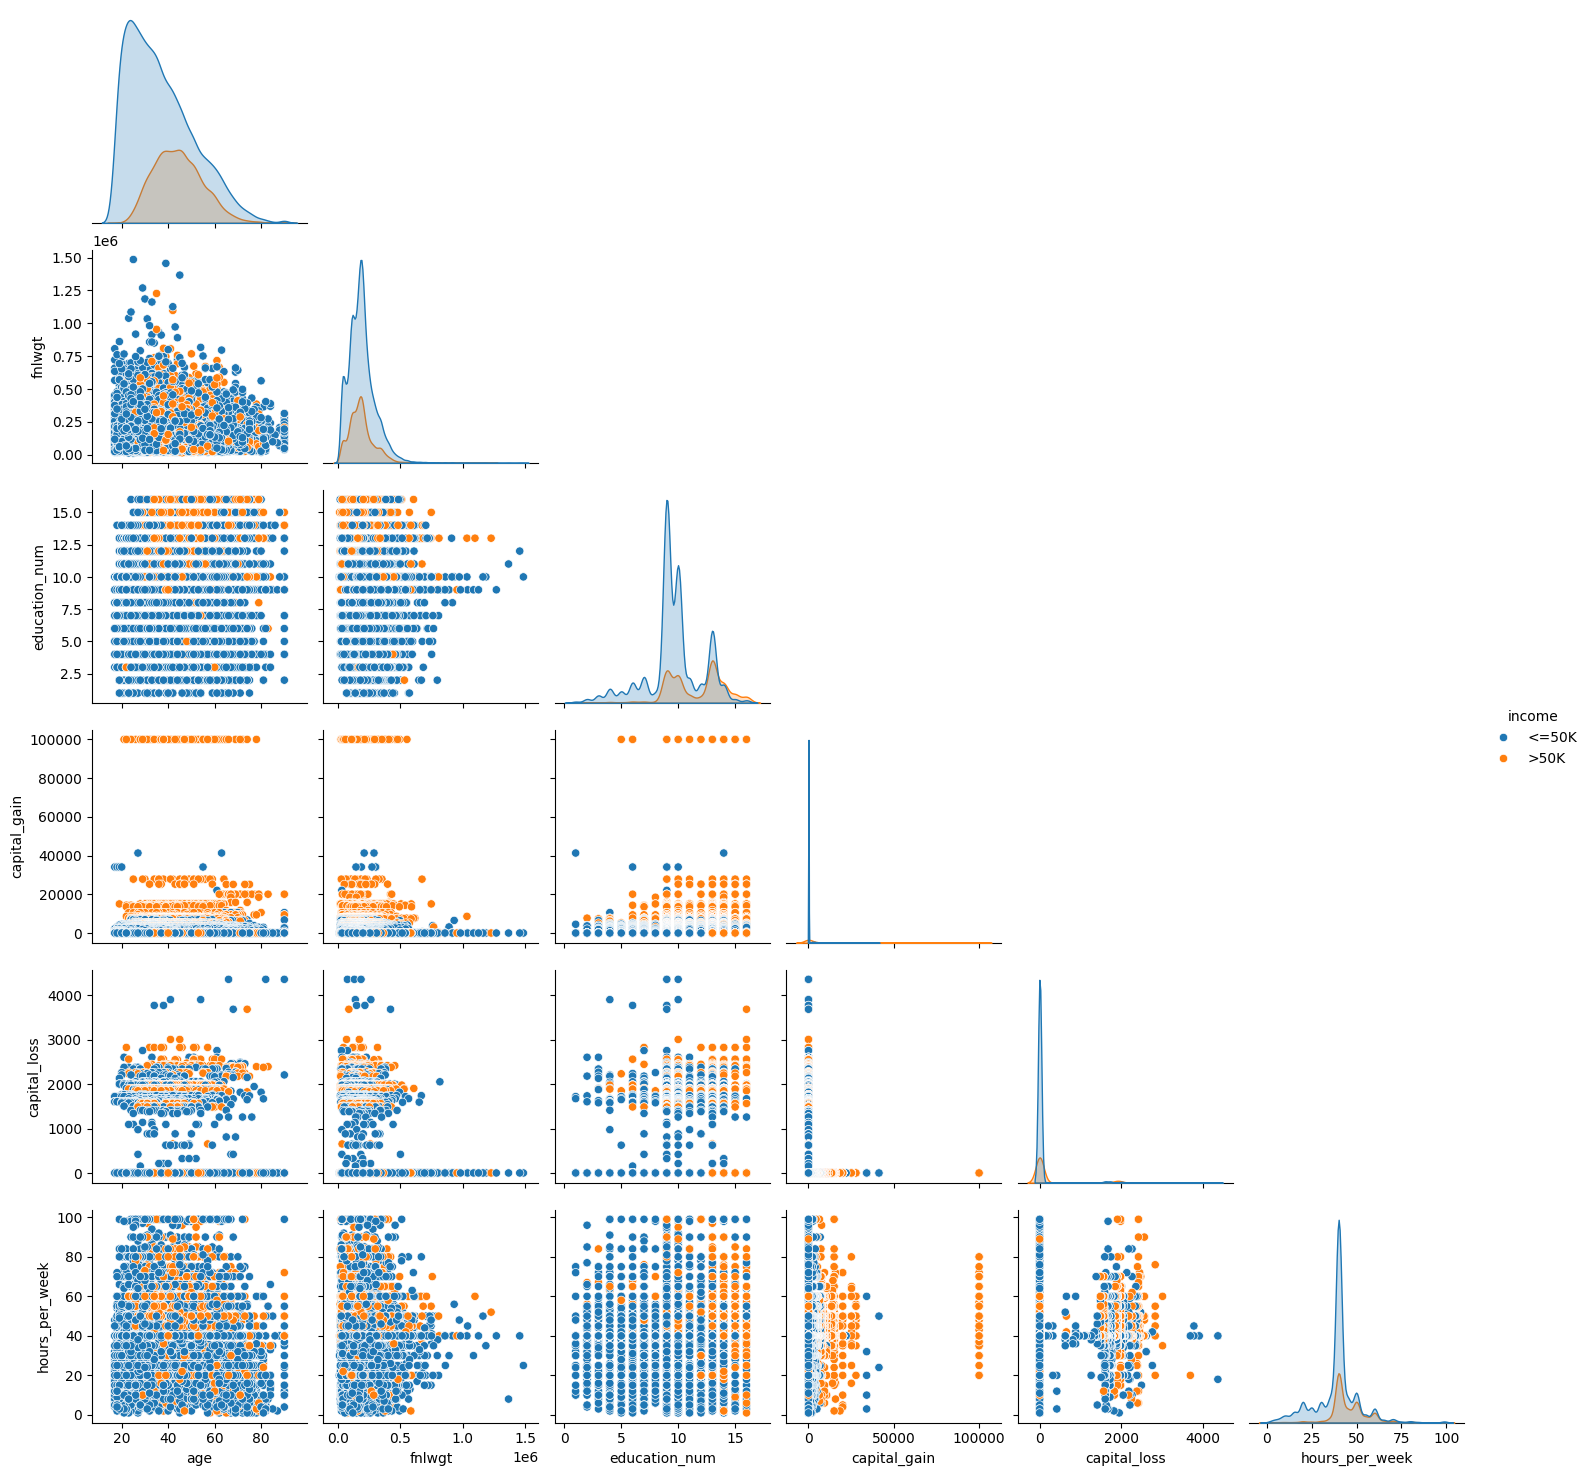

In [65]:
sns.pairplot(df, hue="income", corner=True);

## <font color='#skyblue'> <b>NaN Values</b><font color='black'>

In [67]:
df.isnull().sum()

age                  0
workclass         1836
fnlwgt               0
education            0
education_num        0
marital_status       0
occupation        1843
relationship         0
race                 0
sex                  0
capital_gain         0
capital_loss         0
hours_per_week       0
native_country     582
income               0
dtype: int64

In [68]:
print("Total number of NaN values:", df.isnull().sum().sum())
print("NaN values ​​are ", round((df.isnull().sum().sum() / len(df)) * 100, 3), "% of the data set.")

Total number of NaN values: 4261
NaN values ​​are  13.096 % of the data set.


### <font color='skyblue'> <b>NaN Values In "workclass" Column</b><font color='black'>

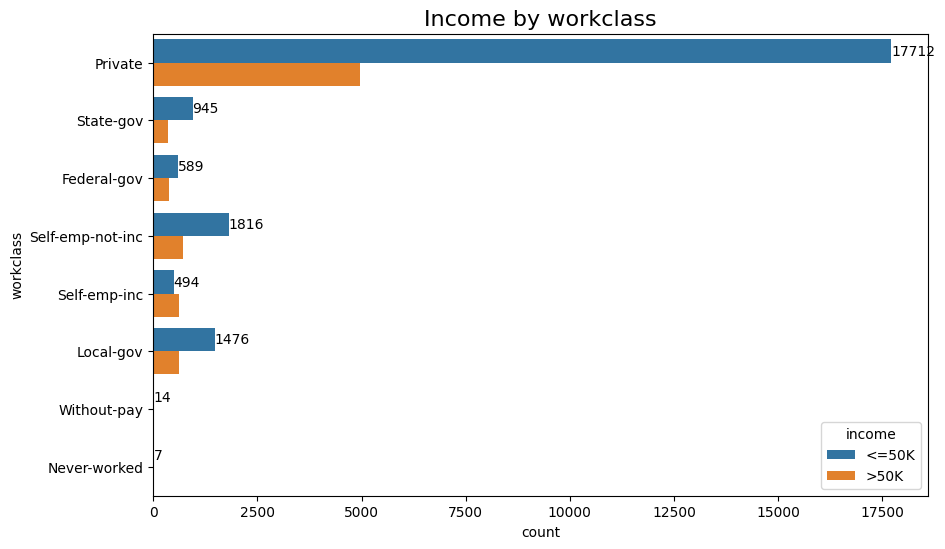

In [70]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['workclass'], hue = df['income'])
plt.title("Income by workclass", fontsize = 16)
ax.bar_label(ax.containers[0]);

In [71]:
df['workclass'] = df['workclass'].fillna('Private')

In [72]:
df.workclass.isnull().sum()

0

### <font color='skyblue'> <b>NaN Values In "occupation" Column</b><font color='black'>

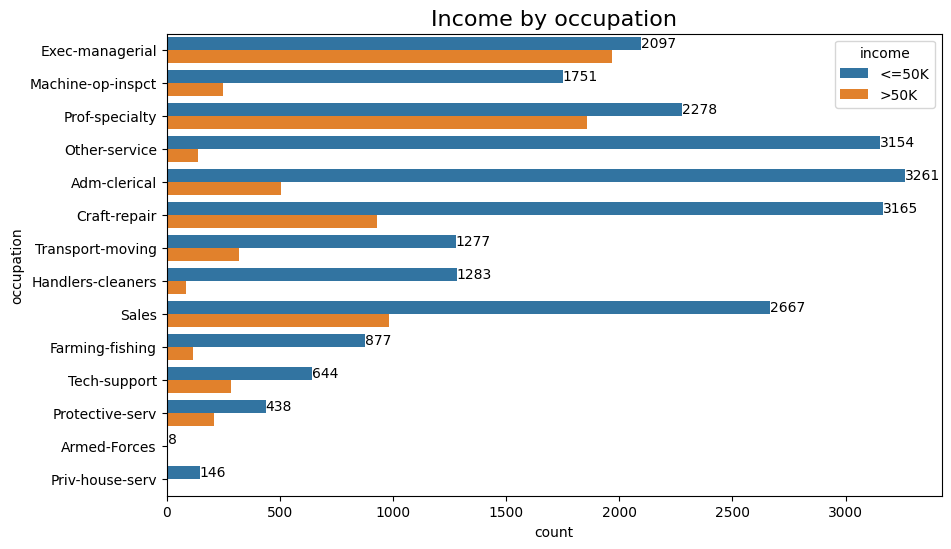

In [74]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['occupation'], hue = df['income'])
plt.title("Income by occupation", fontsize = 16)
ax.bar_label(ax.containers[0]);

In [75]:
df['occupation'] = df['occupation'].fillna(method='bfill')

In [76]:
df.occupation.isnull().sum()

0

### <font color='skyblue'> <b>NaN Values In "native_country" Column</b><font color='black'>

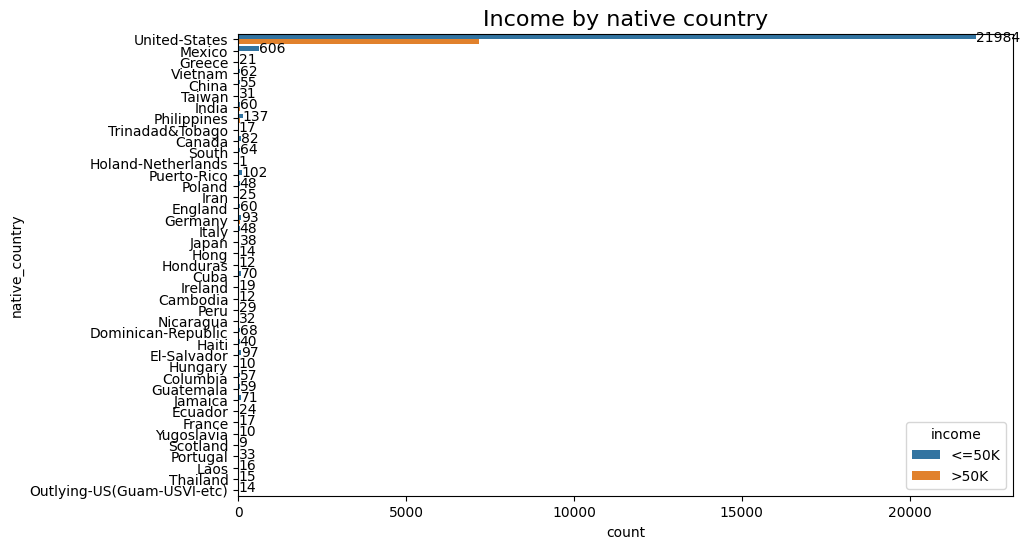

In [78]:
plt.figure(figsize = (10,6))
ax = sns.countplot(y = df['native_country'], hue = df['income'])
plt.title("Income by native country", fontsize = 16)
ax.bar_label(ax.containers[0]);

In [79]:
df['native_country'] = df['native_country'].fillna('United-States')

In [80]:
df.native_country.isnull().sum()

0

In [81]:
df.isnull().sum().sum()

0

## <font color='#skyblue'> <b>Outliers</b><font color='black'>

### <font color='skyblue'> <b>"hours_per_week" Column</b><font color='black'>

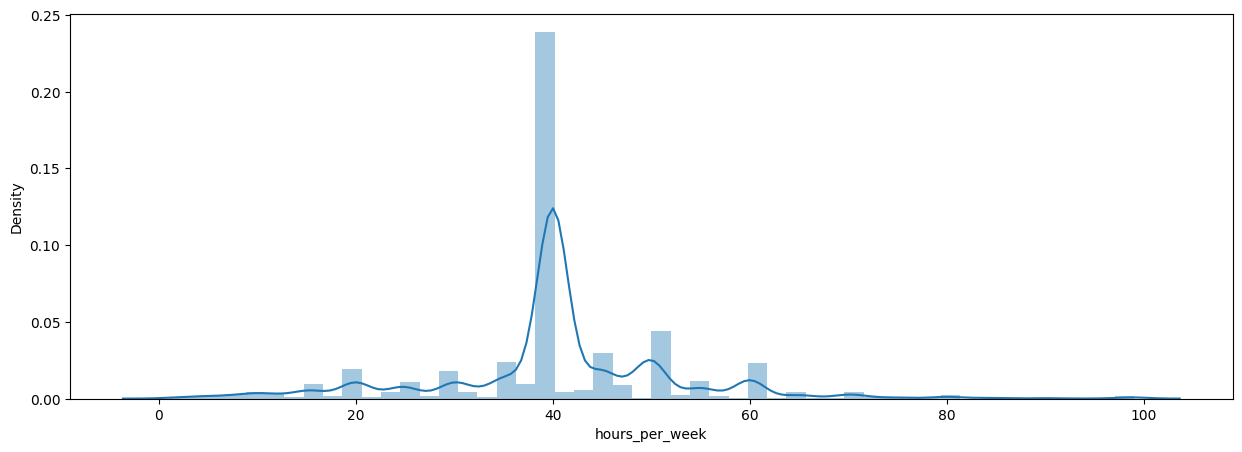

____________________________________________________________________________________________________
skewness in age column : 0.2287588778525044


In [84]:
# Doing univariate analysis on workours column
plt.figure(figsize = (15,5))
sns.distplot(df["hours_per_week"], kde = True)

plt.show()
print("_"*100)
print("skewness in age column :",df["hours_per_week"].skew());

In [85]:
df = df[~((df["hours_per_week"] > 72) | (df["hours_per_week"] < 20))]

### <font color='skyblue'> <b>"capital_gain" & "capital_loss" Columns</b><font color='black'>

In [87]:
df['capital_diff'] = df['capital_gain'] - df['capital_loss']
df['capital_diff'] = pd.cut(df['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
df['capital_diff'] = df['capital_diff'].astype('object')
df.drop(['capital_gain'], axis = 1, inplace = True)
df.drop(['capital_loss'], axis = 1, inplace = True)

def cap_outliers(df, lower_percentile=0.05, upper_percentile=0.95):
    for column in df.select_dtypes(include=np.number):  # Only apply to numeric columns
        lower_bound = df[column].quantile(lower_percentile)
        upper_bound = df[column].quantile(upper_percentile)
        df[column] = np.clip(df[column], lower_bound, upper_bound)
    return df

cap_outliers(df)

### <font color='skyblue'> <b>"fnlwgt" Column</b><font color='black'>

In [90]:
df.drop(labels = ["fnlwgt"],axis = 1,inplace = True)

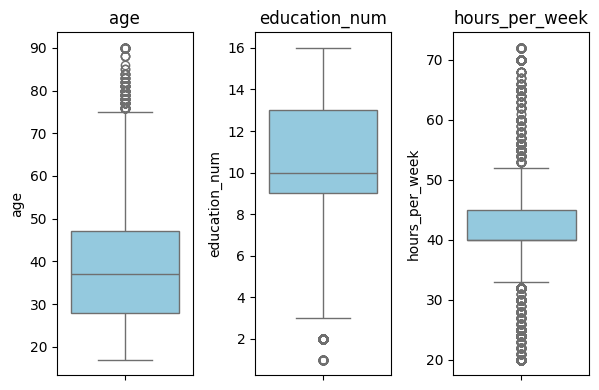

In [91]:
# Checking Outliers in Individual Features
x = 0
#Numerical features;  
numeric_columns = df.select_dtypes(include=['number']).columns
        
# Create a figure with specified size
plt.figure(figsize=(16, 4))

for col in numeric_columns:
    x += 1
    plt.subplot(1, 8, x)
    sns.boxplot(data=df[col], color='skyblue')
    plt.title(col)

plt.tight_layout() 
plt.show()

## <font color='#skyblue'> <b>Feature Engineering</b><font color='black'>

In [93]:
# Removing rows where 'Workclass' is 'Without-pay' and 'Never-worked'
df = df[(df["workclass"] != "Without-pay") & (df["workclass"] != "Never-worked")]

In [94]:
df["education"].replace(["11th", "9th", "7th-8th", "5th-6th", "10th", "1st-4th", "12th"], "School", inplace = True)

In [95]:
df["race"].replace(["Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"],"Others", inplace = True)

In [96]:
df["native_country"].loc[df["native_country"] != "United-States"] = "Others"

In [97]:
df["marital_status"] = df["marital_status"].replace({
    "Married-civ-spouse": "Married",
    "Married-spouse-absent": "Married",
    "Married-AF-spouse": "Married",
    "Separated": "Married",
    "Never-married": "Single",
    "Divorced": "Single",
    "Widowed": "Single"
})

In [99]:
df['income']=df['income'].map({'<=50K': 0, '>50K': 1})

<a id='data-pre'></a>
# <font color='steelblue'> <b>Data Pre-Processing</b><font color='black'>

## <font color='#skyblue'> <b>Train | Test Split</b><font color='black'>

In [172]:
df.income.value_counts()

# <=50 : 0
# >50 : 1

# Unbalanced data

income
0    22817
1     7577
Name: count, dtype: int64

In [174]:
X = df.drop(columns="income")
y = df.income

In [176]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=101, stratify=y)

## <font color='#skyblue'> <b>Encoding</b><font color='black'>

In [100]:
cat_onehot = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'marital_status']
cat_ordinal = ['education', 'capital_diff']
    
cat_for_edu = ['Preschool', 'School', 'HS-grad','Some-college', 'Assoc-voc', 'Assoc-acdm','Bachelors', 'Masters', 'Prof-school', 'Doctorate']
cat_for_capdiff = ['Low', 'High']

In [101]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot), 
                                       (OrdinalEncoder(categories= [cat_for_edu, cat_for_capdiff]), cat_ordinal),
                                       remainder='passthrough')

In [178]:
X_train_trans = column_trans.fit_transform(X_train) 
X_test_trans = column_trans.transform(X_test)

In [180]:
column_trans.get_feature_names_out()

array(['onehotencoder__workclass_Federal-gov',
       'onehotencoder__workclass_Local-gov',
       'onehotencoder__workclass_Private',
       'onehotencoder__workclass_Self-emp-inc',
       'onehotencoder__workclass_Self-emp-not-inc',
       'onehotencoder__workclass_State-gov',
       'onehotencoder__occupation_Adm-clerical',
       'onehotencoder__occupation_Armed-Forces',
       'onehotencoder__occupation_Craft-repair',
       'onehotencoder__occupation_Exec-managerial',
       'onehotencoder__occupation_Farming-fishing',
       'onehotencoder__occupation_Handlers-cleaners',
       'onehotencoder__occupation_Machine-op-inspct',
       'onehotencoder__occupation_Other-service',
       'onehotencoder__occupation_Priv-house-serv',
       'onehotencoder__occupation_Prof-specialty',
       'onehotencoder__occupation_Protective-serv',
       'onehotencoder__occupation_Sales',
       'onehotencoder__occupation_Tech-support',
       'onehotencoder__occupation_Transport-moving',
       'oneh

In [182]:
features = column_trans.get_feature_names_out()

In [184]:
X_train= pd.DataFrame(X_train_trans, columns=features, index=X_train.index)
X_train.head()

,onehotencoder__workclass_Federal-gov,onehotencoder__workclass_Local-gov,onehotencoder__workclass_Private,onehotencoder__workclass_Self-emp-inc,onehotencoder__workclass_Self-emp-not-inc,onehotencoder__workclass_State-gov,onehotencoder__occupation_Adm-clerical,onehotencoder__occupation_Armed-Forces,onehotencoder__occupation_Craft-repair,onehotencoder__occupation_Exec-managerial,...,onehotencoder__sex_Male,onehotencoder__native_country_Others,onehotencoder__native_country_United-States,onehotencoder__marital_status_Married,onehotencoder__marital_status_Single,ordinalencoder__education,ordinalencoder__capital_diff,remainder__age,remainder__education_num,remainder__hours_per_week
8665,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,0.0,1.0,4.0,0.0,55.0,11.0,38.0
17969,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,5.0,0.0,33.0,12.0,50.0
25572,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,1.0,0.0,18.0,7.0,30.0
22735,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,1.0,0.0,1.0,0.0,60.0,4.0,40.0
2639,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,...,0.0,0.0,1.0,1.0,0.0,2.0,1.0,38.0,9.0,40.0


In [186]:
X_test= pd.DataFrame(X_test_trans, columns=features, index=X_test.index)
X_test.head()

,onehotencoder__workclass_Federal-gov,onehotencoder__workclass_Local-gov,onehotencoder__workclass_Private,onehotencoder__workclass_Self-emp-inc,onehotencoder__workclass_Self-emp-not-inc,onehotencoder__workclass_State-gov,onehotencoder__occupation_Adm-clerical,onehotencoder__occupation_Armed-Forces,onehotencoder__occupation_Craft-repair,onehotencoder__occupation_Exec-managerial,...,onehotencoder__sex_Male,onehotencoder__native_country_Others,onehotencoder__native_country_United-States,onehotencoder__marital_status_Married,onehotencoder__marital_status_Single,ordinalencoder__education,ordinalencoder__capital_diff,remainder__age,remainder__education_num,remainder__hours_per_week
14468,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,1.0,1.0,0.0,7.0,0.0,55.0,14.0,45.0
8204,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,5.0,0.0,27.0,12.0,40.0
17326,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,2.0,0.0,25.0,9.0,35.0
15071,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,1.0,5.0,0.0,27.0,12.0,40.0
30587,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,1.0,0.0,2.0,0.0,20.0,9.0,40.0


<a id='log-model'></a>
# <font color='steelblue'> <b>Logistic Regression</b><font color='black'>

## <font color='#skyblue'> <b>Cross Validation</b><font color='black'>

In [209]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.844294
train_accuracy     0.844956
test_precision     0.731655
train_precision    0.732274
test_recall        0.593695
train_recall       0.596026
test_f1            0.655303
train_f1           0.657161
dtype: float64

## <font color='#skyblue'> <b>GridSearchCV</b><font color='black'>

In [190]:
operations = [("scaler", StandardScaler()), ("logistic", LogisticRegression())]

model = Pipeline(steps=operations)

penalty = ["l1", "l2"]
C = np.logspace(-1, 5, 20)
class_weight= ["balanced", None] 

solver = ["lbfgs", "liblinear", "sag", "saga"]

param_grid = {"logistic__penalty" : penalty,
              "logistic__C" : C,
              "logistic__class_weight":class_weight,
              "logistic__solver":solver}

cv = StratifiedKFold(n_splits = 5) 

log_model = GridSearchCV(estimator=model,
                          param_grid=param_grid,
                          cv=cv,
                          scoring = "recall",
                          n_jobs = -1,
                          return_train_score=True)

log_model.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('logistic', LogisticRegression())]),
             n_jobs=-1,
             param_grid={'logistic__C': array([1.00000000e-01, 2.06913808e-01, 4.28133240e-01, 8.85866790e-01,
       1.83298071e+00, 3.79269019e+00, 7.84759970e+00, 1.62377674e+01,
       3.35981829e+01, 6.95192796e+01, 1.43844989e+02, 2.97635144e+02,
       6.15848211e+02, 1.27427499e+03, 2.63665090e+03, 5.45559478e+03,
       1.12883789e+04, 2.33572147e+04, 4.83293024e+04, 1.00000000e+05]),
                         'logistic__class_weight': ['balanced', None],
                         'logistic__penalty': ['l1', 'l2'],
                         'logistic__solver': ['lbfgs', 'liblinear', 'sag',
                                              'saga']},
             return_train_score=True, scoring='recall')

In [197]:
log_model.best_params_

{'logistic__C': 0.1,
 'logistic__class_weight': 'balanced',
 'logistic__penalty': 'l1',
 'logistic__solver': 'liblinear'}

In [199]:
log_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('logistic',
                 LogisticRegression(C=0.1, class_weight='balanced',
                                    penalty='l1', solver='liblinear'))])

In [201]:
def eval_metric(model, X_train, y_train, X_test, y_test):
    y_train_pred = model.predict(X_train)
    y_pred = model.predict(X_test)
    
    print("Test_Set")
    print(confusion_matrix(y_test, y_pred))
    print(classification_report(y_test, y_pred))
    print()
    print("Train_Set")
    print(confusion_matrix(y_train, y_train_pred))
    print(classification_report(y_train, y_train_pred))

eval_metric(log_model, X_train, y_train, X_test, y_test)

Test_Set
[[3643  921]
 [ 258 1257]]
              precision    recall  f1-score   support

           0       0.93      0.80      0.86      4564
           1       0.58      0.83      0.68      1515

    accuracy                           0.81      6079
   macro avg       0.76      0.81      0.77      6079
weighted avg       0.84      0.81      0.82      6079


Train_Set
[[14565  3688]
 [  946  5116]]
              precision    recall  f1-score   support

           0       0.94      0.80      0.86     18253
           1       0.58      0.84      0.69      6062

    accuracy                           0.81     24315
   macro avg       0.76      0.82      0.78     24315
weighted avg       0.85      0.81      0.82     24315



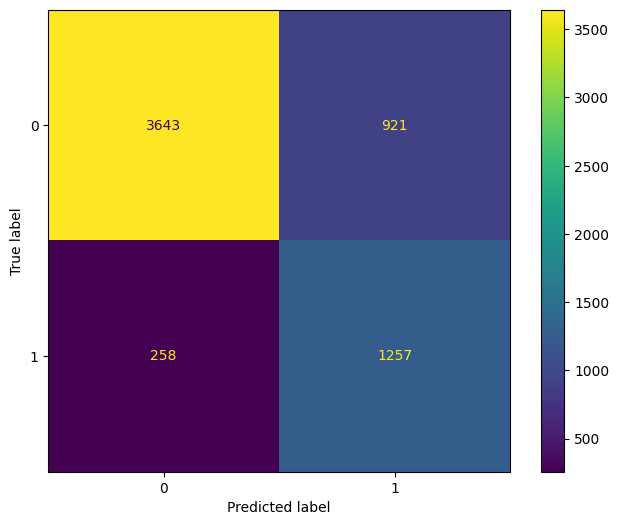

In [203]:
ConfusionMatrixDisplay.from_estimator(log_model, X_test, y_test)
plt.show()

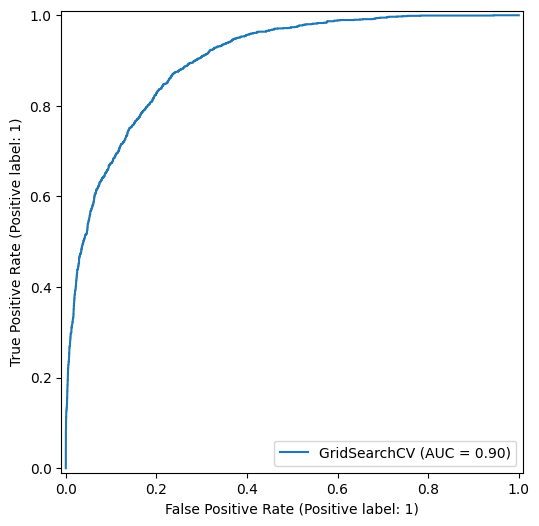

In [207]:
RocCurveDisplay.from_estimator(log_model, X_test, y_test);

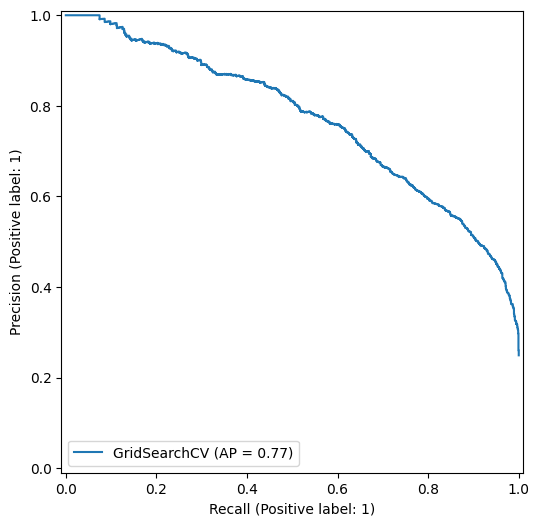

In [205]:
PrecisionRecallDisplay.from_estimator(log_model, X_test, y_test);

<a id='knn-model'></a>
# <font color='steelblue'> <b>K Nearest Neigbors (KNN)</b><font color='black'>

## <font color='#skyblue'> <b>Cross Validation</b><font color='black'>

In [233]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

model = Pipeline(steps=operations)

scores = cross_validate(model, X_train, y_train,
                        scoring = ['accuracy', 'precision','recall','f1'],
                        cv = 10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index = range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.831626
train_accuracy     0.878571
test_precision     0.678013
train_precision    0.781315
test_recall        0.619923
train_recall       0.712324
test_f1            0.647389
train_f1           0.745221
dtype: float64

## <font color='#skyblue'> <b>GridSearchCV</b><font color='black'>

In [211]:
param_grid = [
    {
        "knn__n_neighbors": range(3, 10, 2),
        "knn__metric": ['euclidean', 'manhattan'],
        "knn__weights": ['uniform', 'distance']
    },
    {
        "knn__n_neighbors": range(3, 10, 2),
        "knn__metric": ['minkowski'],
        "knn__p": [1, 2],
        "knn__weights": ['uniform', 'distance']
    }
]

In [213]:
operations = [("scaler", StandardScaler()), ("knn", KNeighborsClassifier())]

model = Pipeline(steps=operations)

knn_model = GridSearchCV(model,
                              param_grid,
                              cv=5,
                              scoring= "accuracy",
                              return_train_score=True
                             )
knn_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('knn', KNeighborsClassifier())]),
             param_grid=[{'knn__metric': ['euclidean', 'manhattan'],
                          'knn__n_neighbors': range(3, 10, 2),
                          'knn__weights': ['uniform', 'distance']},
                         {'knn__metric': ['minkowski'],
                          'knn__n_neighbors': range(3, 10, 2), 'knn__p': [1, 2],
                          'knn__weights': ['uniform', 'distance']}],
             return_train_score=True, scoring='accuracy')

In [215]:
knn_model.best_params_

{'knn__metric': 'euclidean', 'knn__n_neighbors': 9, 'knn__weights': 'uniform'}

In [217]:
knn_model.best_estimator_

Pipeline(steps=[('scaler', StandardScaler()),
                ('knn',
                 KNeighborsClassifier(metric='euclidean', n_neighbors=9))])

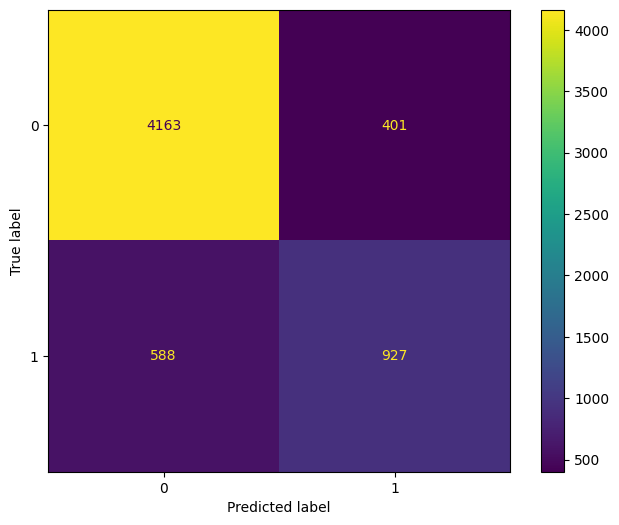

In [219]:
ConfusionMatrixDisplay.from_estimator(knn_model, X_test, y_test)
plt.show()

In [221]:
eval_metric(knn_model, X_train, y_train, X_test, y_test)

Test_Set
[[4163  401]
 [ 588  927]]
              precision    recall  f1-score   support

           0       0.88      0.91      0.89      4564
           1       0.70      0.61      0.65      1515

    accuracy                           0.84      6079
   macro avg       0.79      0.76      0.77      6079
weighted avg       0.83      0.84      0.83      6079


Train_Set
[[16995  1258]
 [ 1993  4069]]
              precision    recall  f1-score   support

           0       0.90      0.93      0.91     18253
           1       0.76      0.67      0.71      6062

    accuracy                           0.87     24315
   macro avg       0.83      0.80      0.81     24315
weighted avg       0.86      0.87      0.86     24315



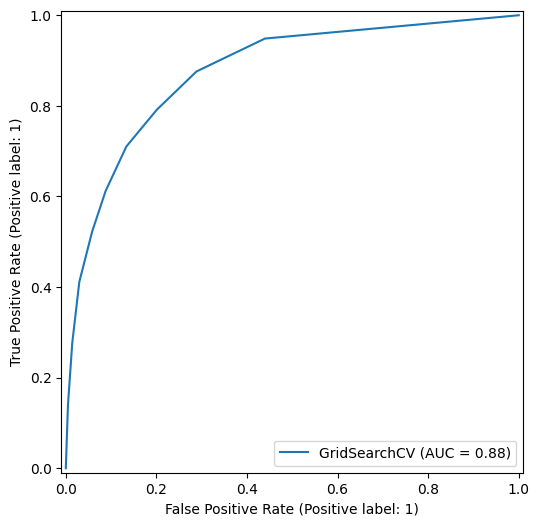

In [223]:
RocCurveDisplay.from_estimator(knn_model, X_test, y_test);

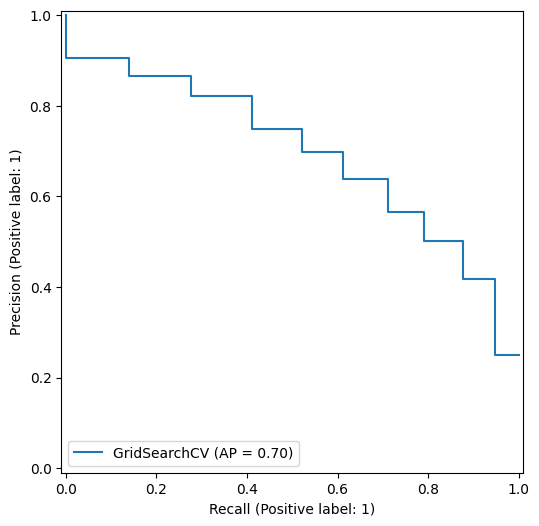

In [225]:
PrecisionRecallDisplay.from_estimator(knn_model, X_test, y_test);

<a id='svm-model'></a>
# <font color='steelblue'> <b>Support Vector Machine (SVC)</b><font color='black'>

## <font color='#skyblue'> <b>Cross Validation</b><font color='black'>

In [227]:
operations = [("scaler", StandardScaler()), ("SVC", SVC())]

pipe_model = Pipeline(steps=operations)

scores = cross_validate(pipe_model,
                        X_train,
                        y_train,
                        scoring=['accuracy', 'precision', 'recall', 'f1'],
                        cv=10,
                        return_train_score=True)

df_scores = pd.DataFrame(scores, index=range(1, 11))
df_scores.mean()[2:]

test_accuracy      0.846062
train_accuracy     0.854246
test_precision     0.743217
train_precision    0.762478
test_recall        0.584956
train_recall       0.603358
test_f1            0.654543
train_f1           0.673631
dtype: float64

## <font color='#skyblue'> <b>GridSearchCV</b><font color='black'>

In [235]:
param_grid = {'SVC__C': [0.01, 0.1, 0.5],
              'SVC__gamma': ["scale", "auto"],
              'SVC__kernel': ['rbf', 'linear']}

operations = [("scaler", StandardScaler()), ("SVC", SVC())]

model = Pipeline(steps=operations)

svm_model = GridSearchCV(model,
                              param_grid,
                              scoring="recall",
                              cv=5,
                              return_train_score=True,
                              n_jobs=1)
svm_model.fit(X_train, y_train)

GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('SVC', SVC())]),
             n_jobs=1,
             param_grid={'SVC__C': [0.01, 0.1, 0.5],
                         'SVC__gamma': ['scale', 'auto'],
                         'SVC__kernel': ['rbf', 'linear']},
             return_train_score=True, scoring='recall')

In [240]:
svm_model.best_params_

{'SVC__C': 0.5, 'SVC__gamma': 'scale', 'SVC__kernel': 'rbf'}

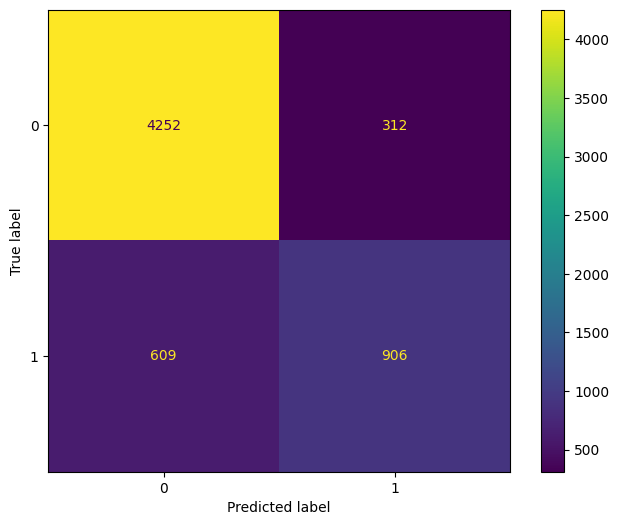

In [242]:
ConfusionMatrixDisplay.from_estimator(svm_model, X_test, y_test)
plt.show()

In [244]:
eval_metric(svm_model, X_train, y_train, X_test, y_test)

Test_Set
[[4252  312]
 [ 609  906]]
              precision    recall  f1-score   support

           0       0.87      0.93      0.90      4564
           1       0.74      0.60      0.66      1515

    accuracy                           0.85      6079
   macro avg       0.81      0.76      0.78      6079
weighted avg       0.84      0.85      0.84      6079


Train_Set
[[17093  1160]
 [ 2447  3615]]
              precision    recall  f1-score   support

           0       0.87      0.94      0.90     18253
           1       0.76      0.60      0.67      6062

    accuracy                           0.85     24315
   macro avg       0.82      0.77      0.79     24315
weighted avg       0.85      0.85      0.85     24315



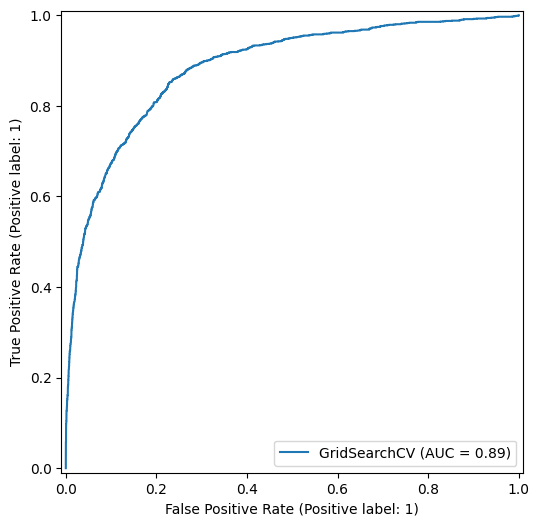

In [246]:
RocCurveDisplay.from_estimator(svm_model, X_test, y_test);

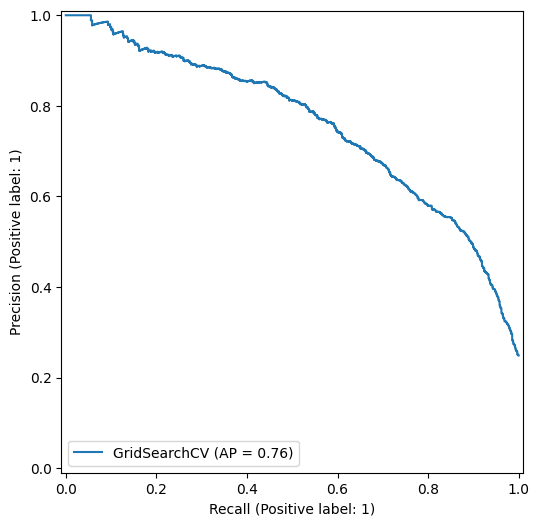

In [248]:
PrecisionRecallDisplay.from_estimator(svm_model, X_test, y_test);

<a id='compare-models'></a>
# <font color='steelblue'> <b>Comparing Models</b><font color='black'>

**Logistic Model Metrics**

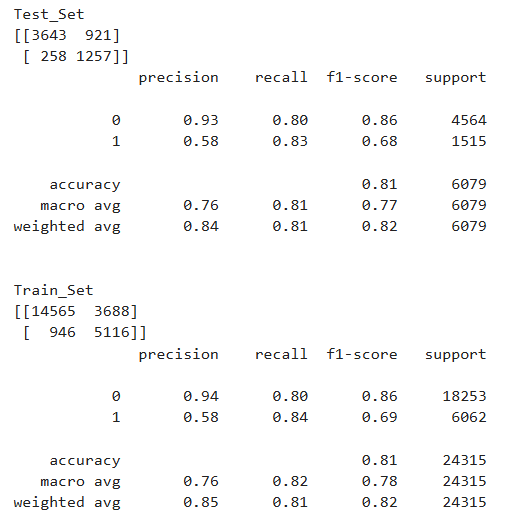

---

**KNN Model Metrics**

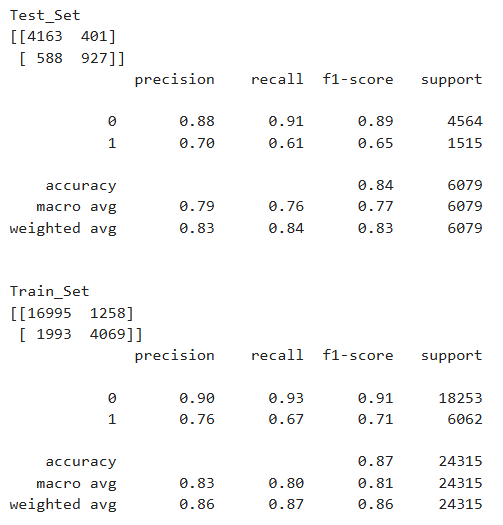

---

**SVM Model Metrics**

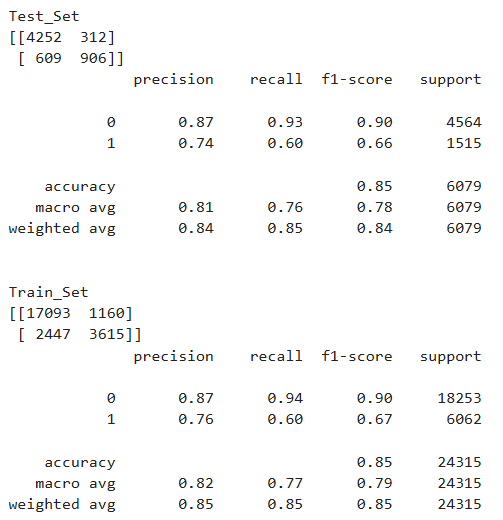

Since the data is imbalanced, attention needs to be paid to the "recall" and "precision" metrics when selecting a model. Specifically:
- **0 (<=50K)**: Being the majority class, achieving high accuracy is relatively easy. However, the main focus should be on...
- **1 (>50K)**: As the minority class, this group needs to be predicted accurately. Therefore, the "recall" and "precision" metrics must be prioritized.

If the objective of the project is:
- To correctly identify individuals with high income (i.e., high "recall" for class 1), the misclassification of such individuals as low income should be minimized.
- To reduce false positives (i.e., high "precision" for class 1), the misclassification of low-income individuals as high income should be controlled.

Based on these considerations, the results have been evaluated as follows:
- **Logistic Model**:
  * Recall for class 1: 0.63, precision: 0.56, and accuracy: 0.76. Logistic Regression showed relatively good performance on imbalanced data, but recall and precision values for class 1 remained low.

- **KNN Model**:
  * Recall for class 1: 0.61, precision: 0.56, and accuracy: 0.79. The KNN model performed similarly to Logistic Regression, with a slightly higher accuracy score.

- **SVM Model**:
  * Recall for class 1: 0.68 (highest), precision: 0.58 (highest), and accuracy: 0.80. The SVM model demonstrated the best performance in identifying class 1 on imbalanced data compared to other models.

**In conclusion, it has been decided that the SVM model should be selected as the final model. This model achieved the highest recall and precision values for class 1, ensuring better identification of the minority class in the imbalanced dataset.**

<a id='final-model'></a>
# <font color='steelblue'> <b>Final Model & Prediction</b><font color='black'>

In [265]:
cat_onehot = ['workclass', 'occupation', 'relationship', 'race', 'sex', 'native_country', 'marital_status']
cat_ordinal = ['education', 'capital_diff']

cat_for_edu = ['Preschool', 'School', 'HS-grad','Some-college', 'Assoc-voc', 'Assoc-acdm','Bachelors', 'Masters', 'Prof-school', 'Doctorate']
cat_for_capdiff = ['Low', 'High']

In [271]:
column_trans = make_column_transformer((OneHotEncoder(handle_unknown="ignore", sparse_output=False), cat_onehot), 
                                       (OrdinalEncoder(categories= [cat_for_edu, cat_for_capdiff]), cat_ordinal),
                                       remainder='passthrough')

In [275]:
operations = [("encoding", column_trans), ("scaler", StandardScaler()), ("SVC", SVC(C=0.5, gamma='scale', kernel='rbf'))]

final_model = Pipeline(steps=operations)

final_model.fit(X,y)

Pipeline(steps=[('encoding',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('onehotencoder',
                                                  OneHotEncoder(handle_unknown='ignore',
                                                                sparse_output=False),
                                                  ['workclass', 'occupation',
                                                   'relationship', 'race',
                                                   'sex', 'native_country',
                                                   'marital_status']),
                                                 ('ordinalencoder',
                                                  OrdinalEncoder(categories=[['Preschool',
                                                                              'School',
                                                                              'HS-grad',
                                                                              'Some-college',
                                                                              'Assoc-voc',
                                                                              'Assoc-acdm',
                                                                              'Bachelors',
                                                                              'Masters',
                                                                              'Prof-school',
                                                                              'Doctorate'],
                                                                             ['Low',
                                                                              'High']]),
                                                  ['education',
                                                   'capital_diff'])])),
                ('scaler', StandardScaler()), ('SVC', SVC(C=0.5))])

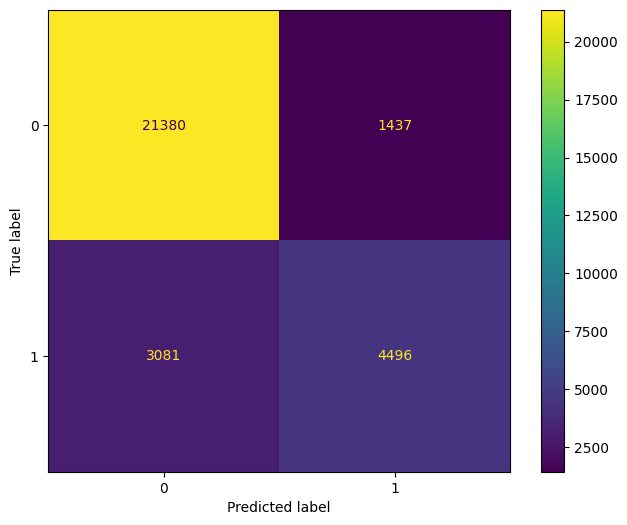

In [277]:
ConfusionMatrixDisplay.from_estimator(final_model, X, y)
plt.show()

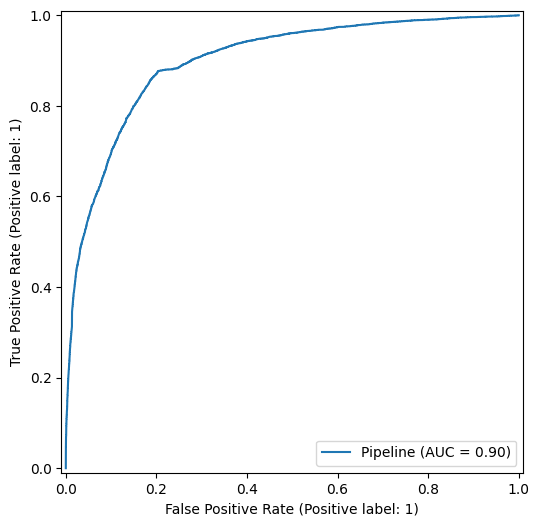

In [281]:
RocCurveDisplay.from_estimator(final_model, X, y);

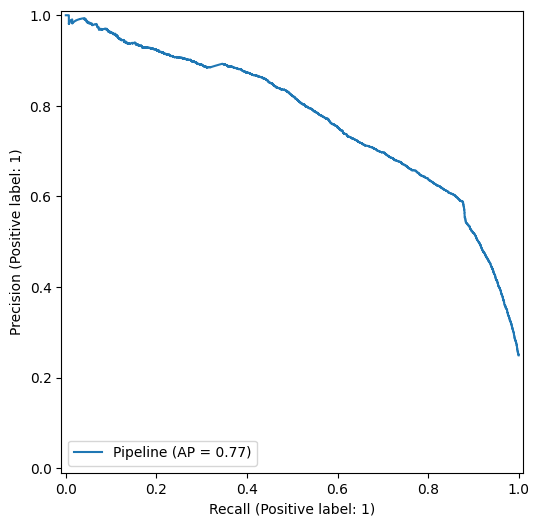

In [283]:
PrecisionRecallDisplay.from_estimator(final_model, X, y);

## <font color='#skyblue'> <b>Prediction</b><font color='black'>

In [285]:
my_dict = {
    "age": [79, 25, 55, 58, 77, 79, 47, 36, 20, 50],
    "fnlwgt": [780331, 982486, 280349, 33829, 924365, 237596, 767527, 1005482, 1401535, 779651],
    "education_num": [12, 9, 16, 8, 4, 5, 15, 3, 8, 5],
    "capital_gain": [15402, 34156, 80276, 66660, 74477, 29406, 8484, 70080, 54144, 41333],
    "capital_loss": [3963, 1707, 867, 1360, 1795, 4071, 3951, 645, 2609, 2837],
    "hours_per_week": [53, 74, 82, 74, 26, 5, 24, 9, 23, 8],
    "workclass": [
        "Self-emp-inc", "Federal-gov", "State-gov", "Private", "Self-emp-not-inc",
        "State-gov", "Self-emp-inc", "State-gov", "Self-emp-inc", "State-gov"
    ],
    "education": [
        "HS-grad", "Masters", "HS-grad", "11th", "10th",
        "10th", "Prof-school", "Bachelors", "HS-grad", "10th"
    ],
    "marital_status": [
        "Separated", "Married-civ-spouse", "Married-AF-spouse", "Married-civ-spouse",
        "Separated", "Married-civ-spouse", "Divorced", "Married-spouse-absent",
        "Separated", "Widowed"
    ],
    "occupation": [
        "Farming-fishing", "Machine-op-inspct", "Exec-managerial", "Protective-serv",
        "Exec-managerial", "Farming-fishing", "Machine-op-inspct",
        "Adm-clerical", "Adm-clerical", "Sales"
    ],
    "relationship": [
        "Husband", "Wife", "Not-in-family", "Other-relative", "Wife",
        "Not-in-family", "Husband", "Wife", "Other-relative", "Unmarried"
    ],
    "race": [
        "Asian-Pac-Islander", "Amer-Indian-Eskimo", "White", "Black",
        "Asian-Pac-Islander", "Amer-Indian-Eskimo", "Asian-Pac-Islander",
        "Black", "Black", "Amer-Indian-Eskimo"
    ],
    "sex": ["Female", "Male", "Male", "Male", "Male", "Female", "Male", "Male", "Male", "Male"],
    "native_country": [
        "Cuba", "Jamaica", "Puerto-Rico", "Ireland", "El-Salvador",
        "Laos", "Outlying-US(Guam-USVI-etc)", "Laos", "Cuba", "Puerto-Rico"
    ]
}

sample = pd.DataFrame(my_dict)
sample

,age,fnlwgt,education_num,capital_gain,capital_loss,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country
0,79,780331,12,15402,3963,53,Self-emp-inc,HS-grad,Separated,Farming-fishing,Husband,Asian-Pac-Islander,Female,Cuba
1,25,982486,9,34156,1707,74,Federal-gov,Masters,Married-civ-spouse,Machine-op-inspct,Wife,Amer-Indian-Eskimo,Male,Jamaica
2,55,280349,16,80276,867,82,State-gov,HS-grad,Married-AF-spouse,Exec-managerial,Not-in-family,White,Male,Puerto-Rico
3,58,33829,8,66660,1360,74,Private,11th,Married-civ-spouse,Protective-serv,Other-relative,Black,Male,Ireland
4,77,924365,4,74477,1795,26,Self-emp-not-inc,10th,Separated,Exec-managerial,Wife,Asian-Pac-Islander,Male,El-Salvador
5,79,237596,5,29406,4071,5,State-gov,10th,Married-civ-spouse,Farming-fishing,Not-in-family,Amer-Indian-Eskimo,Female,Laos
6,47,767527,15,8484,3951,24,Self-emp-inc,Prof-school,Divorced,Machine-op-inspct,Husband,Asian-Pac-Islander,Male,Outlying-US(Guam-USVI-etc)
7,36,1005482,3,70080,645,9,State-gov,Bachelors,Married-spouse-absent,Adm-clerical,Wife,Black,Male,Laos
8,20,1401535,8,54144,2609,23,Self-emp-inc,HS-grad,Separated,Adm-clerical,Other-relative,Black,Male,Cuba
9,50,779651,5,41333,2837,8,State-gov,10th,Widowed,Sales,Unmarried,Amer-Indian-Eskimo,Male,Puerto-Rico


In [287]:
sample.drop(labels = ["fnlwgt"],axis = 1,inplace = True)

In [293]:
sample['capital_diff'] = sample['capital_gain'] - sample['capital_loss']
sample['capital_diff'] = pd.cut(sample['capital_diff'], bins = [-5000, 5000, 100000], labels = ['Low', 'High'])
sample['capital_diff'] = sample['capital_diff'].astype('object')
sample.drop(['capital_gain'], axis = 1, inplace = True)
sample.drop(['capital_loss'], axis = 1, inplace = True)

In [295]:
# Removing rows where 'Workclass' is 'Without-pay' and 'Never-worked'
sample = sample[(sample["workclass"] != "Without-pay") & (sample["workclass"] != "Never-worked")]

In [297]:
sample["education"].replace(["11th", "9th", "7th-8th", "5th-6th", "10th", "1st-4th", "12th"], "School", inplace = True)

In [299]:
sample["race"].replace(["Asian-Pac-Islander", "Amer-Indian-Eskimo", "Other"],"Others", inplace = True)

In [301]:
sample["native_country"].loc[sample["native_country"] != "United-States"] = "Others"

In [303]:
sample["marital_status"] = sample["marital_status"].replace({
    "Married-civ-spouse": "Married",
    "Married-spouse-absent": "Married",
    "Married-AF-spouse": "Married",
    "Separated": "Married",
    "Never-married": "Single",
    "Divorced": "Single",
    "Widowed": "Single"
})

In [309]:
sample

,age,education_num,hours_per_week,workclass,education,marital_status,occupation,relationship,race,sex,native_country,capital_diff
0,79,12,53,Self-emp-inc,HS-grad,Married,Farming-fishing,Husband,Others,Female,Others,High
1,25,9,74,Federal-gov,Masters,Married,Machine-op-inspct,Wife,Others,Male,Others,High
2,55,16,82,State-gov,HS-grad,Married,Exec-managerial,Not-in-family,White,Male,Others,High
3,58,8,74,Private,School,Married,Protective-serv,Other-relative,Black,Male,Others,High
4,77,4,26,Self-emp-not-inc,School,Married,Exec-managerial,Wife,Others,Male,Others,High
5,79,5,5,State-gov,School,Married,Farming-fishing,Not-in-family,Others,Female,Others,High
6,47,15,24,Self-emp-inc,Prof-school,Single,Machine-op-inspct,Husband,Others,Male,Others,Low
7,36,3,9,State-gov,Bachelors,Married,Adm-clerical,Wife,Black,Male,Others,High
8,20,8,23,Self-emp-inc,HS-grad,Married,Adm-clerical,Other-relative,Black,Male,Others,High
9,50,5,8,State-gov,School,Single,Sales,Unmarried,Others,Male,Others,High


In [314]:
prediction = final_model.predict(sample)
prediction

array([1, 1, 1, 0, 1, 0, 0, 0, 0, 0], dtype=int64)

In [316]:
# SVC performs the prediction process through the decision_function function. 
# Positive values ​​indicate class 1, while negative values ​​indicate class 0. 
# The larger the value, the further away the observation is from the hyperplane.

prediction_proba = final_model.decision_function(sample)
prediction_proba

array([ 0.01884872,  0.07756782,  0.44329323, -0.21657941,  0.0738591 ,
       -0.46078782, -0.59190831, -0.3832716 , -0.38231393, -0.38265514])

<a id='conclusion'></a>
# <font color='steelblue'> <b>Conclusion</b><font color='black'>

The analyses and machine learning models implemented in this project have demonstrated the significant role of demographic and socio-economic factors in predicting income levels. The best-performing model achieved satisfactory results in metrics such as accuracy, precision, and recall. The findings of this project can be valuable for academic research and business processes that involve income prediction. In the future, the integration of larger datasets and deep learning algorithms holds potential for further improving model performance.

<p style="background-color:steelblue;font-family:newtimeroman;font-size:200%;color:white;text-align:center;border-radius:40px 20px;"><b>THANK YOU!</b></p>